In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load experiment results
RESULTS_FILE = "rag_experiment_results.csv"
df = pd.read_csv(RESULTS_FILE)
# Replace NaN in reranker column with "no reranker"
df["cross_encoder_model"] = df["cross_encoder_model"].fillna("no reranker")
# --- Helper functions ---
def best_overall(df, metric="factual_correctness(mode=f1)"):
    """Return best parameters based on a target metric."""
    best_row = df.sort_values(metric, ascending=False).iloc[0]
    return best_row.to_dict()

def compare_groups(df, group_col, metric="factual_correctness(mode=f1)"):
    """Compare mean metric per group (e.g., index_name, reranker)."""
    return df.groupby(group_col)[metric].mean().sort_values(ascending=False)

def plot_group(df, group_col, metric="factual_correctness(mode=f1)"):
    """Quick barplot for visual comparison."""
    means = compare_groups(df, group_col, metric)
    means.plot(kind="bar", figsize=(8,4), title=f"{metric} by {group_col}")
    plt.ylabel(metric)
    plt.show()


In [48]:
# --- Q1. Best parameters overall ---
print("\nQ1. Best parameters overall:")
print(best_overall(df))


Q1. Best parameters overall:
{'index_name': 'Custom_splitter_openai', 'alpha': 0.8, 'similarity_top_k': 5, 'cross_encoder_model': 'no reranker', 'llm_model_name': 'gpt-4o-mini', 'rerank_top_n': 3, 'llm_provider': 'openai', 'prompt_template': "metadata={'prompt_type': <PromptType.CUSTOM: 'custom'>} template_vars=['query_str', 'context_str'] kwargs={} output_parser=None template_var_mappings=None function_mappings=None template='You are a helpful assistant that answers Japan visa questions.\\n\\nQuestion: {query_str}\\n\\nHere are the retrieved documents:\\n{context_str}\\n\\nAnswer clearly and concisely.'", 'faithfulness': 0.9644871794871795, 'factual_correctness(mode=f1)': 0.6239999999999999, 'llm_context_precision_with_reference': 0.8924999999781459, 'context_recall': 0.8893694062991051, 'avg_latency_sec': 4.6400552749633786, 'latency_95th_sec': 7.732542037963867}


In [49]:
# --- Q1b. Best parameters overall (by context_recall) ---
print("\nQ1b. Best parameters overall (by context_recall):")
print(best_overall(df, metric="context_recall"))


Q1b. Best parameters overall (by context_recall):
{'index_name': 'Custom_splitter_w_context_openai', 'alpha': 0.8, 'similarity_top_k': 15, 'cross_encoder_model': 'no reranker', 'llm_model_name': 'gpt-4o-mini', 'rerank_top_n': 3, 'llm_provider': 'openai', 'prompt_template': "metadata={'prompt_type': <PromptType.CUSTOM: 'custom'>} template_vars=['query_str', 'context_str'] kwargs={} output_parser=None template_var_mappings=None function_mappings=None template='You are a helpful assistant that answers Japan visa questions.\\n\\nQuestion: {query_str}\\n\\nHere are the retrieved documents:\\n{context_str}\\n\\nAnswer clearly and concisely.'", 'faithfulness': 0.995, 'factual_correctness(mode=f1)': 0.51, 'llm_context_precision_with_reference': 0.8068651087595929, 'context_recall': 1.0, 'avg_latency_sec': 5.662418627738953, 'latency_95th_sec': 8.750399112701416}


In [63]:
df.columns

Index(['index_name', 'alpha', 'similarity_top_k', 'cross_encoder_model',
       'llm_model_name', 'rerank_top_n', 'llm_provider', 'prompt_template',
       'faithfulness', 'factual_correctness(mode=f1)',
       'llm_context_precision_with_reference', 'context_recall',
       'avg_latency_sec', 'latency_95th_sec'],
      dtype='object')


Q2. Which index_name is better?
index_name
Custom_splitter_openai              0.524799
Custom_splitter_w_context_openai    0.514948
Normal_splitter_openai              0.483625
Normal_splitter_hf                  0.464062
Custom_splitter_w_context_hf        0.450728
Normal_splitter_w_context_openai    0.448062
Custom_splitter_hf                  0.434375
Normal_splitter_w_context_hf        0.380687
Name: factual_correctness(mode=f1), dtype: float64


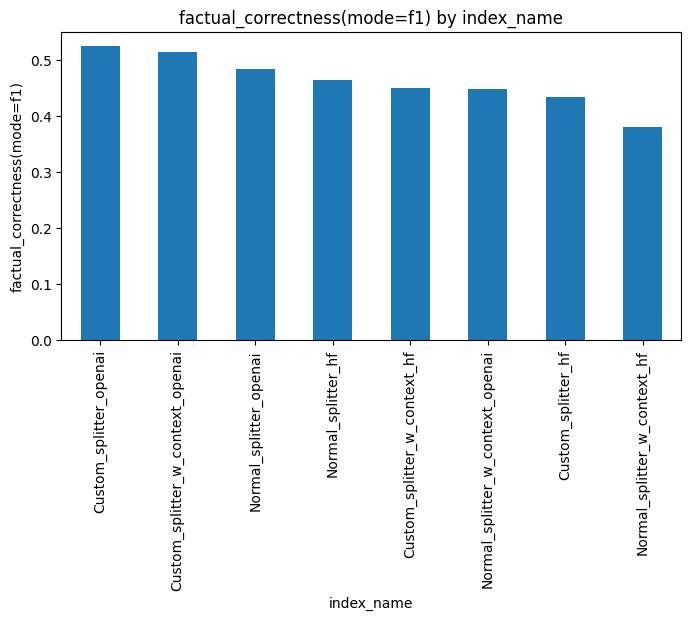

In [50]:
# --- Q2. Best index_name (splitter + embedding) ---
print("\nQ2. Which index_name is better?")
print(compare_groups(df, "index_name"))
plot_group(df, "index_name")


Q2b. Which index_name is better (by faithfulness)?
index_name
Custom_splitter_openai              0.966108
Custom_splitter_w_context_openai    0.964917
Custom_splitter_w_context_hf        0.959355
Normal_splitter_w_context_openai    0.948893
Custom_splitter_hf                  0.948004
Normal_splitter_openai              0.942219
Normal_splitter_hf                  0.941720
Normal_splitter_w_context_hf        0.912370
Name: faithfulness, dtype: float64


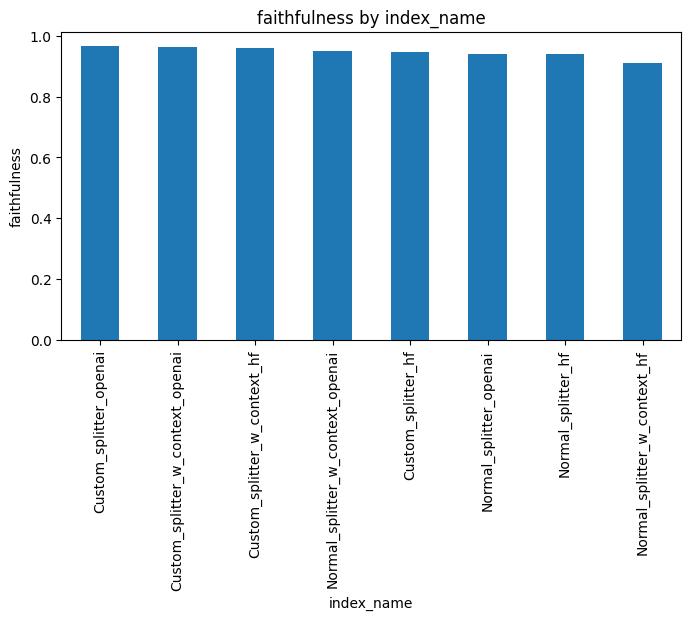

In [65]:
# --- Extra group comparisons by context_recall ---
print("\nQ2b. Which index_name is better (by faithfulness)?")
print(compare_groups(df, "index_name", metric="faithfulness"))
plot_group(df, "index_name", metric="faithfulness")


Q2b. Which index_name is better (by llm_context_precision_with_reference)?
index_name
Custom_splitter_openai              0.847217
Custom_splitter_w_context_openai    0.832296
Custom_splitter_hf                  0.824146
Custom_splitter_w_context_hf        0.821304
Normal_splitter_w_context_openai    0.757539
Normal_splitter_w_context_hf        0.744226
Normal_splitter_hf                  0.742973
Normal_splitter_openai              0.705561
Name: llm_context_precision_with_reference, dtype: float64


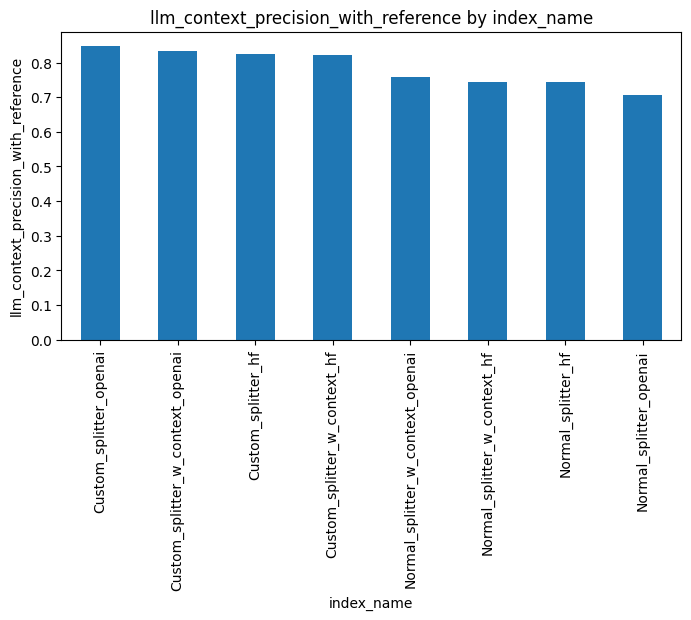

In [68]:
# --- Extra group comparisons by precision ---
print("\nQ2b. Which index_name is better (by llm_context_precision_with_reference)?")
print(compare_groups(df, "index_name", metric="llm_context_precision_with_reference"))
plot_group(df, "index_name", metric="llm_context_precision_with_reference")


Q2b. Which index_name is better (by context_recall)?
index_name
Custom_splitter_w_context_openai    0.849223
Custom_splitter_w_context_hf        0.839627
Custom_splitter_openai              0.837651
Normal_splitter_w_context_openai    0.786264
Normal_splitter_w_context_hf        0.700309
Custom_splitter_hf                  0.691824
Normal_splitter_hf                  0.646468
Normal_splitter_openai              0.608419
Name: context_recall, dtype: float64


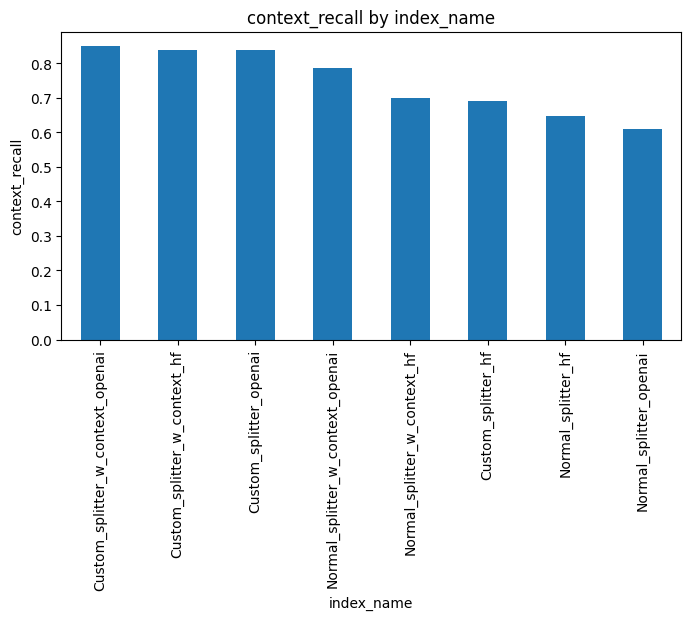

In [66]:
# --- Extra group comparisons by context_recall ---
print("\nQ2b. Which index_name is better (by context_recall)?")
print(compare_groups(df, "index_name", metric="context_recall"))
plot_group(df, "index_name", metric="context_recall")


Q3b. Reranker effect (by context_recall):
cross_encoder_model
no reranker                             0.837276
cross-encoder/ms-marco-MiniLM-L-2-v2    0.680327
Name: context_recall, dtype: float64


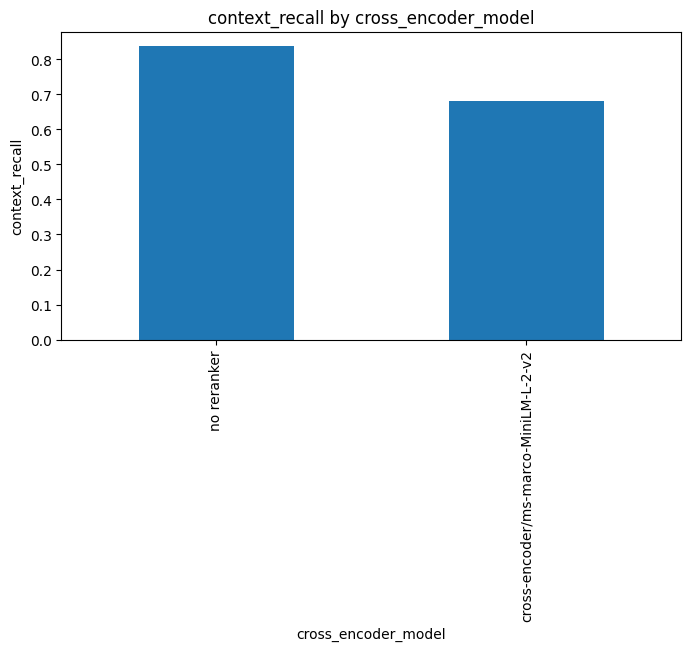

In [69]:
print("\nQ3b. Reranker effect (by context_recall):")
print(compare_groups(df, "cross_encoder_model", metric="context_recall"))
plot_group(df, "cross_encoder_model", metric="context_recall")


Q3b. Reranker effect (by llm_context_precision_with_reference):
cross_encoder_model
cross-encoder/ms-marco-MiniLM-L-2-v2    0.811270
no reranker                             0.769894
Name: llm_context_precision_with_reference, dtype: float64


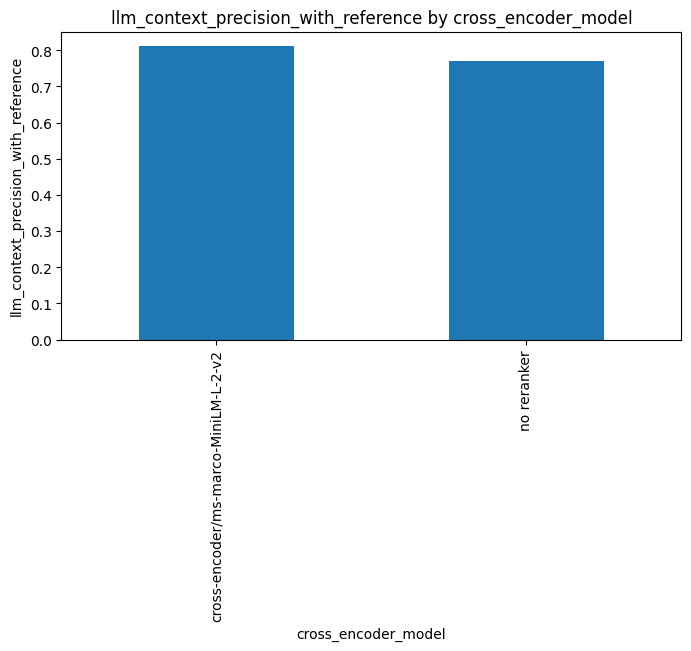

In [70]:
print("\nQ3b. Reranker effect (by llm_context_precision_with_reference):")
print(compare_groups(df, "cross_encoder_model", metric="llm_context_precision_with_reference"))
plot_group(df, "cross_encoder_model", metric="llm_context_precision_with_reference")


Q4. Alpha effect:
alpha
0.8    0.468798
1.0    0.467227
Name: factual_correctness(mode=f1), dtype: float64


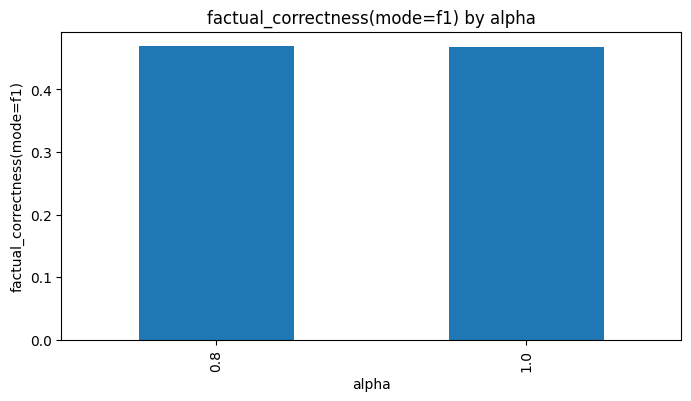

In [54]:
# --- Q4. Alpha (semantic vs hybrid) ---
print("\nQ4. Alpha effect:")
print(compare_groups(df, "alpha"))
plot_group(df, "alpha")


Q4b. Alpha effect (by context_recall):
alpha
1.0    0.767152
0.8    0.749987
Name: context_recall, dtype: float64


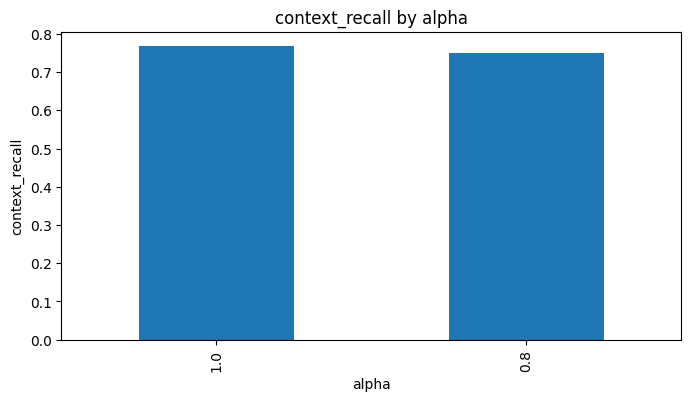

In [55]:
print("\nQ4b. Alpha effect (by context_recall):")
print(compare_groups(df, "alpha", metric="context_recall"))
plot_group(df, "alpha", metric="context_recall")


Q5b. Similarity top_k effect (by context_recall):
similarity_top_k
15    0.828494
10    0.806580
5     0.730168
3     0.663438
Name: context_recall, dtype: float64


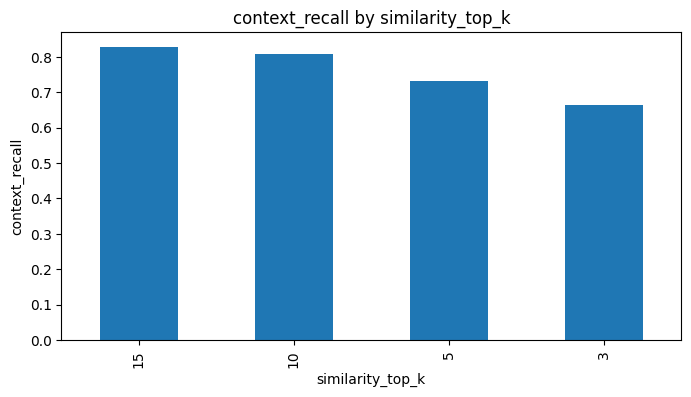

In [71]:
print("\nQ5b. Similarity top_k effect (by context_recall):")
print(compare_groups(df, "similarity_top_k", metric="context_recall"))
plot_group(df, "similarity_top_k", metric="context_recall")


In [58]:
# --- Q6. Should rerank_top_n be increased? ---
print("\nQ6. rerank_top_n effect (constant in current runs):")
print(df["rerank_top_n"].unique())
print("Currently fixed; re-run with different values to measure impact.")


Q6. rerank_top_n effect (constant in current runs):
[3]
Currently fixed; re-run with different values to measure impact.


In [59]:
# --- Q7. Retrieval performance metrics ---
print("\nQ7. Retrieval performance (ragas metrics):")
print(" - Precision (llm_context_precision_with_reference):", df["llm_context_precision_with_reference"].mean())
print(" - Recall (context_recall):", df["context_recall"].mean())
print("Higher precision = retrieved docs are relevant.\nHigher recall = retrieved enough docs.")


Q7. Retrieval performance (ragas metrics):
 - Precision (llm_context_precision_with_reference): 0.7905823105341141
 - Recall (context_recall): 0.7588014821872952
Higher precision = retrieved docs are relevant.
Higher recall = retrieved enough docs.


In [60]:
# --- Q8. Generation correctness ---
print("\nQ8. Generation correctness (ragas metrics):")
print(" - Faithfulness:", df["faithfulness"].mean())
print(" - Factual Correctness:", df["factual_correctness(mode=f1)"].mean())
print("Faithfulness = grounded in retrieved docs.\nFactual correctness = aligns with gold answers.")


Q8. Generation correctness (ragas metrics):
 - Faithfulness: 0.9500909952975813
 - Factual Correctness: 0.4679910446160446
Faithfulness = grounded in retrieved docs.
Factual correctness = aligns with gold answers.


In [61]:
# --- Q9. End-to-end system performance ---
print("\nQ9. End-to-end RAG performance:")
summary = df[[
    "faithfulness",
    "factual_correctness(mode=f1)",
    "llm_context_precision_with_reference",
    "context_recall",
    "avg_latency_sec"
]].mean()
print(summary)


Q9. End-to-end RAG performance:
faithfulness                            0.950091
factual_correctness(mode=f1)            0.467991
llm_context_precision_with_reference    0.790582
context_recall                          0.758801
avg_latency_sec                         5.489708
dtype: float64


In [62]:
# --- Q10. Optimization recommendation ---
print("\nQ10. What to optimize?")
print("""
- If precision/recall are low → tune retrieval (indexing method, alpha, top_k, reranker).
- If faithfulness is low → improve prompt or grounding strategy.
- If factual correctness is low → better LLM or reranking.
- If latency is too high → reduce top_k or avoid heavy reranker.
""")


Q10. What to optimize?

- If precision/recall are low → tune retrieval (indexing method, alpha, top_k, reranker).
- If faithfulness is low → improve prompt or grounding strategy.
- If factual correctness is low → better LLM or reranking.
- If latency is too high → reduce top_k or avoid heavy reranker.

